# Threshold Based Anomaly Event Detection

The source code is originally from https://github.com/Amossys-team/SPOT


Initial threshold : 9.05e-05
Number of peaks : 19
Grimshaw maximum log-likelihood estimation ... [done]
	γ = -0.5112022831631106
	σ = 5.207106456308606e-05
	L = 178.1079651570123
Extreme quantile (probability = 0.0001): 0.00018539213659667098


100%|██████████| 20915/20915 [00:00<00:00, 23661.31it/s]


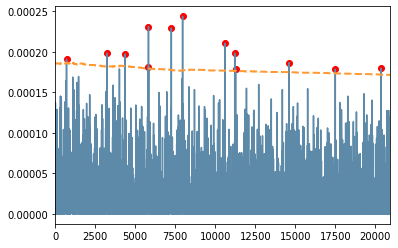

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from spot import SPOT

f = './rain.dat'
r = open(f,'r').read().split(',')
X = np.array(list(map(float,r)))

n_init = 1000
init_data = X[:n_init] 	# initial batch
data = X[n_init:] 		# stream

q = 1e-4  			# risk parameter
s = SPOT(q)  		# biDSPOT object
s.fit(init_data,data) 	# data import
s.initialize() 		# initialization step
results = s.run() 	# run
s.plot(results) 	# plot

Initial threshold : {'up': 4.528844444444445, 'down': -3.411928888888893}
Number of peaks : {'up': 30, 'down': 31}
Grimshaw maximum log-likelihood estimation ... [done]
	          Parameters               Upper               Lower
	------------------------------------------------------------
	                   γ                0.00               -0.03
	                   σ                0.62                0.31
	          likelihood               15.44                6.43
	    Extreme quantile                6.35               -4.29
	------------------------------------------------------------


100%|██████████| 15801/15801 [00:28<00:00, 557.25it/s] 


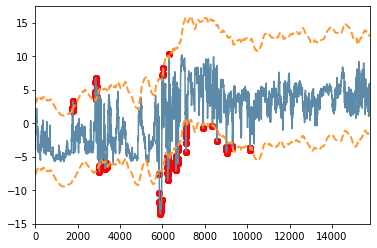

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from spot import bidSPOT

f = './physics.dat'
r = open(f,'r').read().split(',')
X = np.array(list(map(float,r)))

n_init = 2000
init_data = X[:n_init] 	# initial batch
data = X[n_init:]  		# stream

q = 1e-3 				# risk parameter
d = 450  				# depth parameter
s = bidSPOT(q,d)     	# biDSPOT object
s.fit(init_data,data) 	# data import
s.initialize() 	  		# initialization step
results = s.run()    	# run
s.plot(results) 	 	# plot

Initial threshold : {'up': 3.216400039999982, 'down': -4.633200140000007}
Number of peaks : {'up': 18, 'down': 19}
Grimshaw maximum log-likelihood estimation ... [done]
	          Parameters               Upper               Lower
	------------------------------------------------------------
	                   γ                0.00                0.00
	                   σ                1.60                0.42
	          likelihood               26.40                2.41
	    Extreme quantile                7.91               -5.88
	------------------------------------------------------------


100%|██████████| 1518/1518 [00:03<00:00, 448.85it/s]


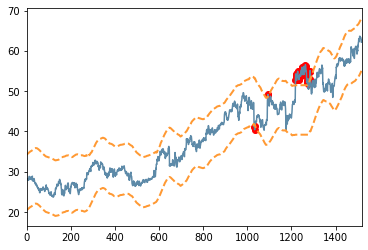

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from spot import bidSPOT
import pandas as pd

f = 'stocks.csv'
r = pd.read_csv(f)
r = r['MSFT'].dropna()
# convert df to numpy array
X = r.values

# TODO calibration uses 1000 data points
# q is 1e-3
# try window sizes 50, 200, 500 and think about the impacts.
